<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [ ]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9533,2024-01-10,376.369995,384.170013,376.320007,382.769989,382.769989,25514200
9534,2024-01-11,386.000000,390.679993,380.380005,384.630005,384.630005,27850800
9535,2024-01-12,385.489990,388.679993,384.649994,388.470001,388.470001,21645700
9536,2024-01-16,393.660004,394.029999,387.619995,390.269989,390.269989,27202300


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9533,2024-01-10,382.769989
9534,2024-01-11,384.630005
9535,2024-01-12,388.470001
9536,2024-01-16,390.269989


In [ ]:
import datetime

def strToDate(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year = year, month = month, day = day)

In [ ]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

<ipython-input-6-8bf308d6ac9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9533   2024-01-10
9534   2024-01-11
9535   2024-01-12
9536   2024-01-16
9537   2024-01-17
Name: Date, Length: 9538, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-01-10,382.769989
2024-01-11,384.630005
2024-01-12,388.470001


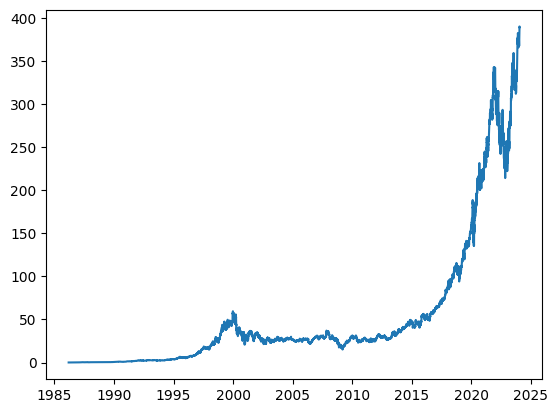

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '1986-03-18',
                                '2024-01-17',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1986-03-18,0.097222,0.100694,0.102431,0.099826
1,1986-03-19,0.100694,0.102431,0.099826,0.098090
2,1986-03-20,0.102431,0.099826,0.098090,0.095486
3,1986-03-21,0.099826,0.098090,0.095486,0.092882
4,1986-03-24,0.098090,0.095486,0.092882,0.090278
...,...,...,...,...,...
9530,2024-01-10,367.750000,374.690002,375.790009,382.769989
9531,2024-01-11,374.690002,375.790009,382.769989,384.630005
9532,2024-01-12,375.790009,382.769989,384.630005,388.470001
9533,2024-01-16,382.769989,384.630005,388.470001,390.269989


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((9535,), (9535, 3, 1), (9535,))

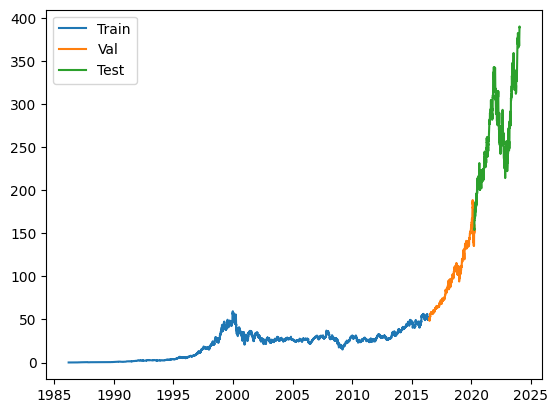

In [ ]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100)



Epoch 1/100
239/239 [==============================] - 5s 7ms/step - loss: 114.0453 - mean_absolute_error: 4.7516 - val_loss: 3275.0027 - val_mean_absolute_error: 45.6840
Epoch 2/100
239/239 [==============================] - 2s 6ms/step - loss: 0.3738 - mean_absolute_error: 0.3540 - val_loss: 2996.7266 - val_mean_absolute_error: 42.7988
Epoch 3/100
239/239 [==============================] - 2s 7ms/step - loss: 0.3280 - mean_absolute_error: 0.3294 - val_loss: 2898.4158 - val_mean_absolute_error: 41.7870
Epoch 4/100
239/239 [==============================] - 1s 5ms/step - loss: 0.3187 - mean_absolute_error: 0.3255 - val_loss: 2832.0081 - val_mean_absolute_error: 41.1252
Epoch 5/100
239/239 [==============================] - 1s 5ms/step - loss: 0.3351 - mean_absolute_error: 0.3398 - val_loss: 2790.6067 - val_mean_absolute_error: 40.5604
Epoch 6/100
239/239 [==============================] - 1s 4ms/step - loss: 0.3520 - mean_absolute_error: 0.3528 - val_loss: 2793.0505 - val_mean_absolute

239/239 [==============================] - 1s 5ms/step


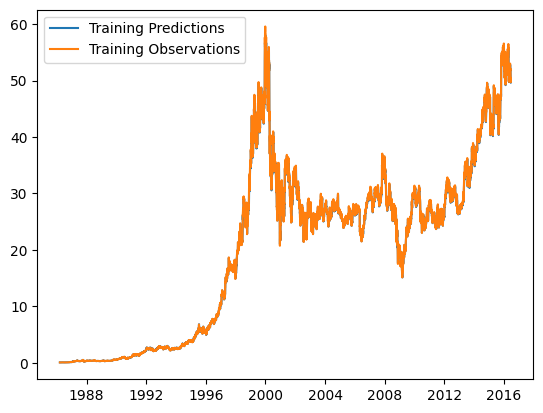

In [ ]:
train_predict = model.predict(X_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

30/30 [==============================] - 0s 2ms/step


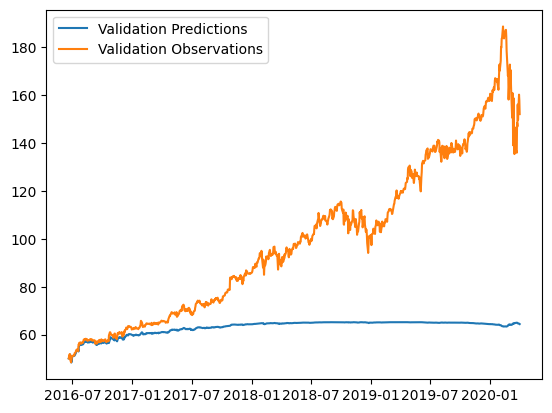

In [ ]:
val_predict = model.predict(X_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

30/30 [==============================] - 0s 3ms/step


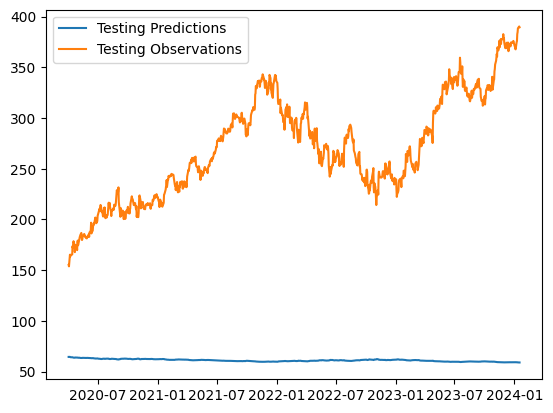

In [ ]:
test_predict = model.predict(X_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 22ms/step


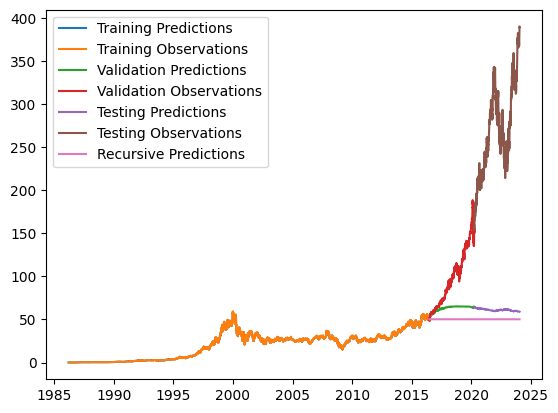

In [ ]:
plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 'Training Observations', 'Validation Predictions',
            'Validation Observations', 'Testing Predictions', 'Testing Observations', 'Recursive Predictions'])

In [ ]:
!pip install tensorflow
